# **Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Mounting google drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Uploading data from google drive**

In [ ]:
##/content/drive/MyDrive/hyper-kvasir-labeled-images.zip

import os

# Set the path to the zip file in your Google Drive
zip_path = "/content/drive/MyDrive/hyper-kvasir-labeled-images-processed-1.zip"

# Set the target directory for extracting the contents
extract_path = "/content"

# Create the target directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
!unzip "{zip_path}" -d "{extract_path}"

Streaming output truncated to the last 5000 lines.
  inflating: /content/hyper-kvasir-labeled-images/lower-gi-tract-therapeutic-interventions-dyed-lifted-polyps/790ffa5b-1b71-4f9d-8fef-c1c8cfba4e95.jpg  
  inflating: /content/hyper-kvasir-labeled-images/lower-gi-tract-therapeutic-interventions-dyed-lifted-polyps/79121d51-43a3-404f-971c-fcbf1f4d443c.jpg  
  inflating: /content/hyper-kvasir-labeled-images/lower-gi-tract-therapeutic-interventions-dyed-lifted-polyps/7960255b-88a3-40de-a8f1-74fb06df06f8.jpg  
  inflating: /content/hyper-kvasir-labeled-images/lower-gi-tract-therapeutic-interventions-dyed-lifted-polyps/79799a48-3995-4ce8-b791-825e42de4073.jpg  
  inflating: /content/hyper-kvasir-labeled-images/lower-gi-tract-therapeutic-interventions-dyed-lifted-polyps/79d1156e-8f75-4b3f-92bb-c70a0fa35cb4.jpg  
  inflating: /content/hyper-kvasir-labeled-images/lower-gi-tract-therapeutic-interventions-dyed-lifted-polyps/7a5da58e-fea8-4543-b871-fc5c3f8d9fa9.jpg  
  inflating: /content/hyper-kva

#***Pre-process the data set***

**Removing -imagel-label and license.txt file***

In [ ]:
import os

def remove_files(folder_path, file_names):
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"File {file_name} removed successfully.")
        else:
            print(f"File {file_name} does not exist in the specified folder.")

# Example usage:
folder_path = "/content/hyper-kvasir-labeled-images"  # Replace with the path to your uploaded folder in Colab
files_to_remove = ["image-labels.csv", "license.txt"]  # Replace with the names of the files you want to remove

remove_files(folder_path, files_to_remove)


File image-labels.csv removed successfully.
File license.txt removed successfully.


## **Data Set Analyzing**

**Each Label Class Image**

In [ ]:
#count the number of images in the respective classes
ROOT_DIR = "/content/hyper-kvasir-labeled-images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()


dict_items([('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-1-2', 11), ('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-2-3', 28), ('upper-gi-tract-pathological-findings-esophagitis-a', 403), ('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-3', 133), ('lower-gi-tract-quality-of-mucosal-views-bbps-0-1', 646), ('lower-gi-tract-therapeutic-interventions-dyed-lifted-polyps', 1002), ('upper-gi-tract-anatomical-landmarks-z-line', 932), ('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-1', 201), ('lower-gi-tract-anatomical-landmarks-retroflex-rectum', 391), ('lower-gi-tract-pathological-findings-polyps', 1028), ('lower-gi-tract-therapeutic-interventions-dyed-resection-margins', 989), ('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-2', 443), ('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-0-1', 35), ('upper-gi-tract-pathological-findings-barretts', 41), ('upper-gi-tract-pathological-findings-esophagitis

**Image in Each Class Visualization**

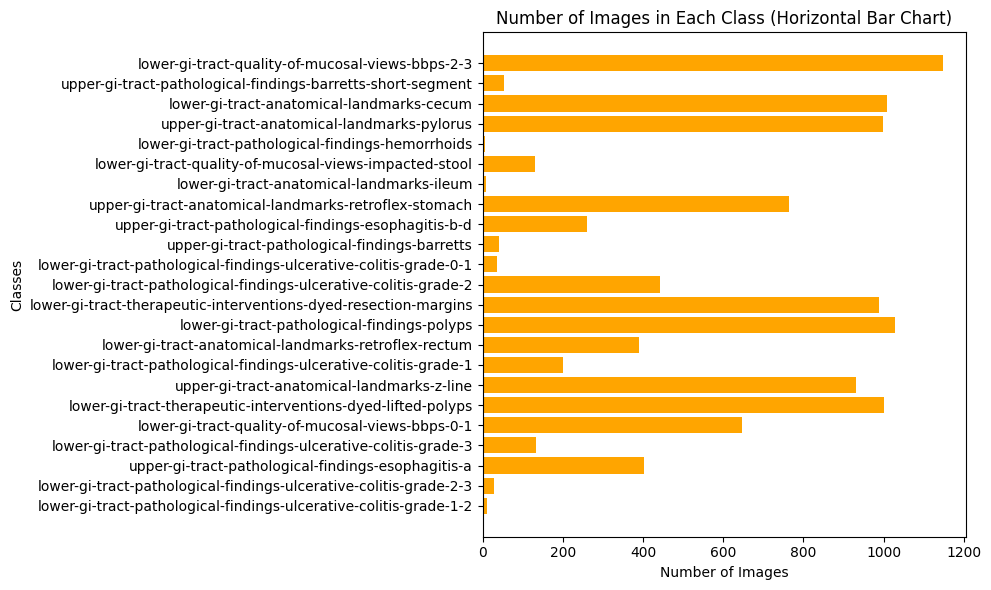

In [ ]:
import os
import matplotlib.pyplot as plt

ROOT_DIR = "/content/hyper-kvasir-labeled-images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Convert the dictionary items to lists
classes = list(number_of_images.keys())
counts = list(number_of_images.values())

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(classes, counts, color='orange')
plt.xlabel('Number of Images')
plt.ylabel('Classes')
plt.title('Number of Images in Each Class (Horizontal Bar Chart)')
plt.tight_layout()

# Show the plot
plt.show()


**label Class which has the lowest number of image**

In [ ]:
import os

ROOT_DIR = "/content/hyper-kvasir-labeled-images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Find the class with the fewest images
min_class = min(number_of_images, key=lambda k: number_of_images[k])

print(f"The class with the fewest images is '{min_class}' with {number_of_images[min_class]} images.")


The class with the fewest images is 'lower-gi-tract-pathological-findings-hemorrhoids' with 6 images.


**Class label which has less than 400 image**

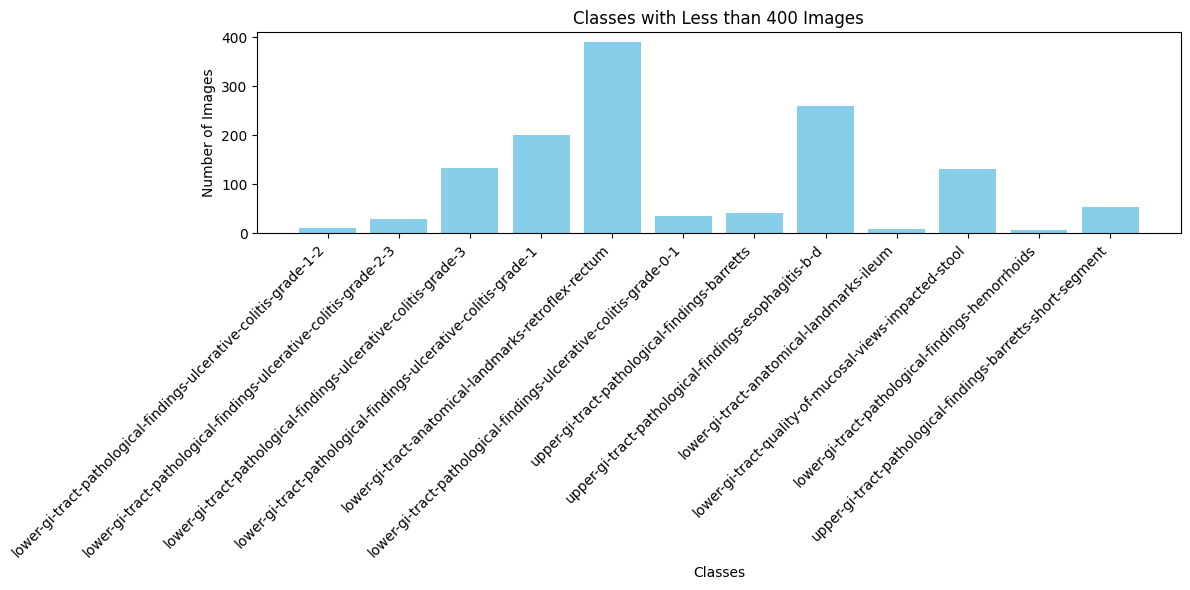

In [ ]:
import os
import matplotlib.pyplot as plt

ROOT_DIR = "/content/hyper-kvasir-labeled-images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Filter classes with less than 400 images
filtered_classes = {key: value for key, value in number_of_images.items() if value < 400}

# Convert the filtered dictionary items to lists
classes = list(filtered_classes.keys())
counts = list(filtered_classes.values())

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Classes with Less than 400 Images')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


**Class label which has less than 100 images**

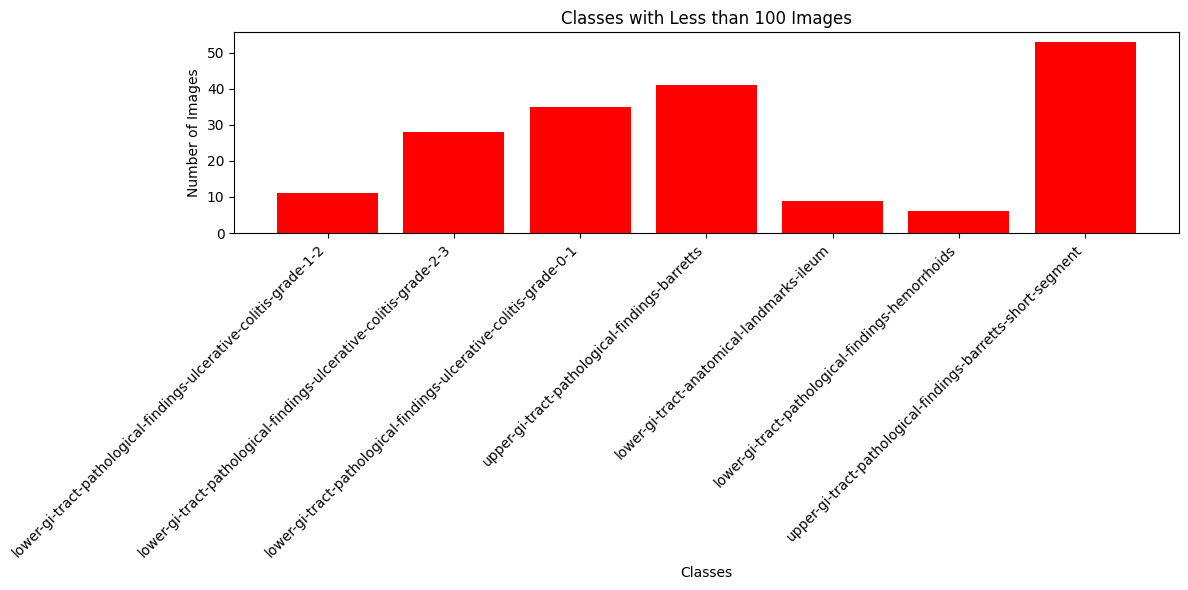

In [ ]:
import os
import matplotlib.pyplot as plt

ROOT_DIR = "/content/hyper-kvasir-labeled-images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Filter classes with less than 400 images
filtered_classes = {key: value for key, value in number_of_images.items() if value < 100}

# Convert the filtered dictionary items to lists
classes = list(filtered_classes.keys())
counts = list(filtered_classes.values())

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(classes, counts, color='red')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Classes with Less than 100 Images')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

**Importing Important Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import tensorflow as tf



In [ ]:
pip install Augmentor

In [ ]:
import Augmentor

#**Image Pre-processing**

**Data Augmentation**

In [ ]:
p = Augmentor.Pipeline("/content/hyper-kvasir-labeled-images",output_directory="/content/hyper-augmented")
#Step 3 Define the Operations
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(12000)

Initialised with 10662 image(s) found.
Output directory set to /content/hyper-augmented.

Processing <PIL.Image.Image image mode=RGB size=1225x1013 at 0x7F257F7E7CA0>: 100%|██████████| 12000/12000 [14:58<00:00, 13.36 Samples/s]


In [ ]:
#count the number of images in the respective classes
ROOT_DIR_AUG = "/content/hyper-augmented"
number_of_images = {}

for dir in os.listdir(ROOT_DIR_AUG):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR_AUG,dir)))

number_of_images.items()

dict_items([('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-1-2', 11), ('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-2-3', 34), ('upper-gi-tract-pathological-findings-esophagitis-a', 442), ('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-3', 159), ('lower-gi-tract-quality-of-mucosal-views-bbps-0-1', 758), ('lower-gi-tract-therapeutic-interventions-dyed-lifted-polyps', 1132), ('upper-gi-tract-anatomical-landmarks-z-line', 1053), ('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-1', 230), ('lower-gi-tract-anatomical-landmarks-retroflex-rectum', 475), ('lower-gi-tract-pathological-findings-polyps', 1202), ('lower-gi-tract-therapeutic-interventions-dyed-resection-margins', 1083), ('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-2', 487), ('lower-gi-tract-pathological-findings-ulcerative-colitis-grade-0-1', 26), ('upper-gi-tract-pathological-findings-barretts', 52), ('upper-gi-tract-pathological-findings-esophagit

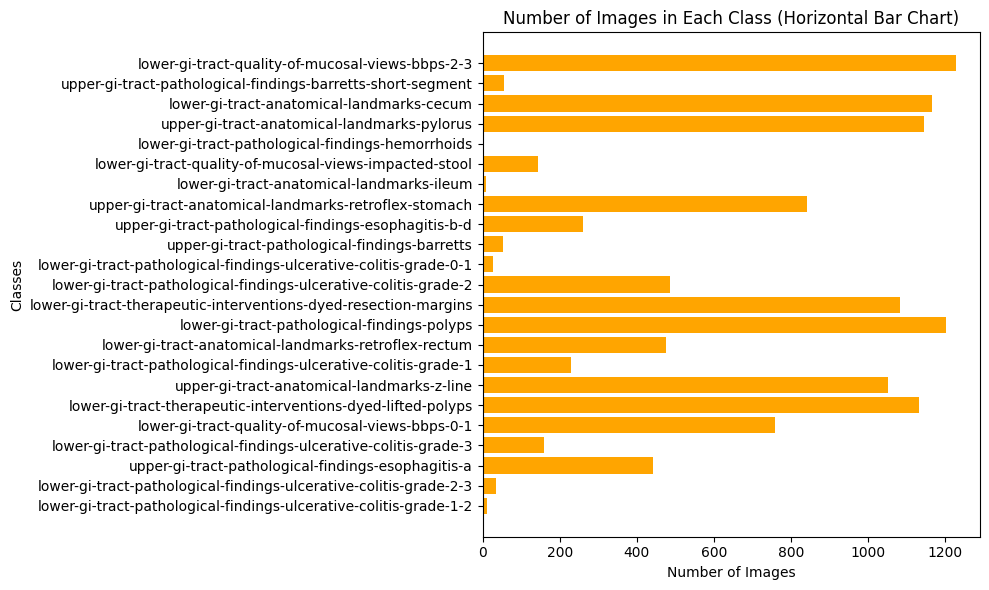

In [ ]:
import os
import matplotlib.pyplot as plt

ROOT_DIR_AUG = "/content/hyper-augmented"
number_of_images = {}

for dir in os.listdir(ROOT_DIR_AUG):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR_AUG, dir)))

# Convert the dictionary items to lists
classes = list(number_of_images.keys())
counts = list(number_of_images.values())

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(classes, counts, color='orange')
plt.xlabel('Number of Images')
plt.ylabel('Classes')
plt.title('Number of Images in Each Class (Horizontal Bar Chart)')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import os

ROOT_DIR_AUG = "/content/hyper-augmented"
number_of_images = {}

for dir in os.listdir(ROOT_DIR_AUG):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR_AUG, dir)))

# Find the class with the fewest images
min_class = min(number_of_images, key=lambda k: number_of_images[k])

print(f"The class with the fewest images is '{min_class}' with {number_of_images[min_class]} images.")

The class with the fewest images is 'lower-gi-tract-pathological-findings-hemorrhoids' with 4 images.


**Training and Testing object creation**

In [ ]:
##Training DataSet
# train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2 #10 percent data for validation
# )
img_height=224
img_width=224
train_datagen  = tf.keras.utils.image_dataset_from_directory(
  ROOT_DIR_AUG,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

##Testing DataSet
# test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255,
#     #shear_range=0.2,
#     #zoom_range=0.2,
#     #horizontal_flip=True,
#     validation_split=0.2 #10 percent data for validation
# )

test_datagen = tf.keras.utils.image_dataset_from_directory(
  ROOT_DIR_AUG,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

Found 12000 files belonging to 23 classes.
Using 9600 files for training.
Found 12000 files belonging to 23 classes.
Using 2400 files for validation.


**Normalization**

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
import numpy as np
normalized_ds = train_datagen.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


**Autotune**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_datagen = train_datagen.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_datagen = test_datagen.cache().prefetch(buffer_size=AUTOTUNE)

#**Processing Data for Training-Testing-Validation**

**Training**

In [ ]:
# train_datagen=train_datagen.flow_from_directory(
#     ROOT_DIR,
#     target_size=(224,224),
#     batch_size=32,
#     subset='training')

**Testing**

In [ ]:
# test_datagen=test_datagen.flow_from_directory(
#     ROOT_DIR,
#     target_size=(224,224),
#     batch_size=32,
#     subset='validation')

#**Building Models**

**1st Model**

In [ ]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=256,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=16,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))




#cnn.add(tf.keras.layers.Conv2D(filters=16,padding='same',strides=2,kernel_size=3,activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

#cnn.add(tf.keras.layers.Conv2D(filters=16,padding='same',strides=2,kernel_size=3,activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

#cnn.add(tf.keras.layers.Conv2D(filters=8,padding='same',strides=2,kernel_size=3,activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

#cnn.add(tf.keras.layers.Conv2D(filters=8,padding='same',strides=2,kernel_size=3,activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))



cnn.add(tf.keras.layers.Flatten())
#cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(23,activation='softmax'))

***Model details***

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

**Compiling the model**

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Early stopping and model checkpoints**

In [ ]:
#EARLY STOPPING & MODEL CHECKPOINTS
from keras.callbacks import ModelCheckpoint,EarlyStopping

#EARLY STOPPING
es = EarlyStopping(monitor = "val_accuracy",min_delta = 0.01,patience = 7,verbose = 1,mode = 'auto')

#MODEL CHECKPOINTS
mc = ModelCheckpoint(monitor = "val_accuracy",filepath = "./bestmodel.h5",verbose = 1,save_best_only = True,mode = 'auto')

cd = [es,mc]

**Fitting the model**

In [ ]:
sadman=cnn.fit(train_datagen,steps_per_epoch=23,epochs=50,verbose = 1,validation_data = test_datagen,validation_steps = 16,callbacks = cd)

Epoch 1/50


ValueError: ignored

# **Graphical Interpretation of the Model**

In [ ]:
#GRAPHICAL INTERPRETATION
h = sadman.history
h.keys()

**Accuracy Vs Validation Accuracy**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title("ACCURACY vs VALIDATION ACCURACY")
plt.show()

**Loss Vs Validation Loss**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title("LOSS vs VALIDATION LOSS ")
plt.show()

# **Calculating Model Accuracy**

In [ ]:
#Calculating Model Accuracy

from keras.models import load_model
model = load_model("/content/bestmodel.h5")

In [ ]:
accuracy_sadman = model.evaluate_generator(test_datagen)[1]
print(f"Accuracy is {accuracy_sadman*100}%.")

## **Model**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D,Conv2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model = ResNet50(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model.layers[:10]:
    layer.trainable = False
x = base_model.output
x = Conv2D(128,(3,3),activation='relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(23, activation='softmax')(x)
model1 = Model(inputs=base_model.inputs, outputs=predictions)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model1 = DenseNet201(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model1.layers[:10]:
    layer.trainable = False
x = base_model1.output
x = Conv2D(128,(3,3),activation='relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(23, activation='softmax')(x)
model2 = Model(inputs=base_model1.inputs, outputs=predictions)

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D,Conv2D,Dense,Dropout
base_model2 = InceptionV3(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model2.layers[:10]:
    layer.trainable = False
x = base_model2.output
x = Conv2D(128,(3,3),activation='relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(23, activation='softmax')(x)
model3 = Model(inputs=base_model2.inputs, outputs=predictions)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model4 = VGG16(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model4.layers[:10]:
    layer.trainable = False
x = base_model4.output

x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(23, activation='softmax')(x)
model4 = Model(inputs=base_model4.inputs, outputs=predictions)

NameError: ignored

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch

model_filepath = "/content/drive/My Drive/model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
model1.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
model2.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

NameError: ignored

In [ ]:
model3.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
model4.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history1=model1.fit(
  train_datagen,
  validation_data=test_datagen,
  epochs=5,callbacks=[checkpoint])

Epoch 1/5
300/300 [==============================] - ETA: 0s - loss: 1.1274 - accuracy: 0.6420
Epoch 1: val_accuracy improved from -inf to 0.73750, saving model to /content/drive/My Drive/model-01-0.7375.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 184s 360ms/step - loss: 1.1274 - accuracy: 0.6420 - val_loss: 0.8677 - val_accuracy: 0.7375
Epoch 2/5
300/300 [==============================] - ETA: 0s - loss: 0.6184 - accuracy: 0.7900
Epoch 2: val_accuracy did not improve from 0.73750
300/300 [==============================] - 102s 338ms/step - loss: 0.6184 - accuracy: 0.7900 - val_loss: 0.8387 - val_accuracy: 0.7300
Epoch 3/5
300/300 [==============================] - ETA: 0s - loss: 0.5012 - accuracy: 0.8284
Epoch 3: val_accuracy improved from 0.73750 to 0.80750, saving model to /content/drive/My Drive/model-03-0.8075.hdf5
300/300 [==============================] - 104s 345ms/step - loss: 0.5012 - accuracy: 0.8284 - val_loss: 0.5882 - val_accuracy: 0.8075
Epoch 4/5
300/300 [==============================] - ETA: 0s - loss: 0.4203 - accuracy: 0.8554
Epoch 4: val_accuracy did not improve from 0.80750
300/300 [==============================] - 102s 339ms/step - loss: 0.4203 - accuracy: 0.855

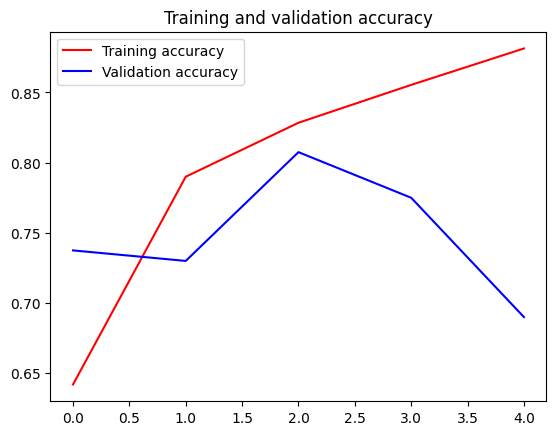

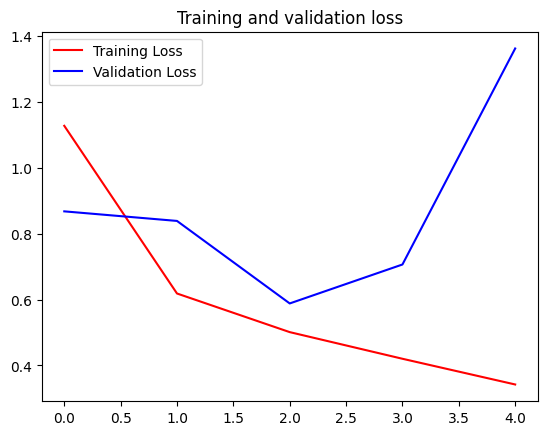

In [ ]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
history2=model2.fit(
  train_datagen,
  validation_data=test_datagen,
  epochs=5)#25,callbacks=[checkpoint])

Epoch 1/5


In [ ]:
history3=model3.fit(
  train_datagen,
  validation_data=test_datagen,
  epochs=5,callbacks=[checkpoint])

Epoch 1/5
300/300 [==============================] - ETA: 0s - loss: 1.4260 - accuracy: 0.5242
Epoch 1: val_accuracy did not improve from 0.80750
300/300 [==============================] - 110s 236ms/step - loss: 1.4260 - accuracy: 0.5242 - val_loss: 3.7702 - val_accuracy: 0.3308
Epoch 2/5
300/300 [==============================] - ETA: 0s - loss: 0.9400 - accuracy: 0.6685
Epoch 2: val_accuracy did not improve from 0.80750
300/300 [==============================] - 69s 230ms/step - loss: 0.9400 - accuracy: 0.6685 - val_loss: 5.2252 - val_accuracy: 0.4033
Epoch 3/5
300/300 [==============================] - ETA: 0s - loss: 0.7567 - accuracy: 0.7428
Epoch 3: val_accuracy did not improve from 0.80750
300/300 [==============================] - 69s 230ms/step - loss: 0.7567 - accuracy: 0.7428 - val_loss: 1.3322 - val_accuracy: 0.5908
Epoch 4/5
300/300 [==============================] - ETA: 0s - loss: 0.6466 - accuracy: 0.7780
Epoch 4: val_accuracy did not improve from 0.80750
300/300 [====

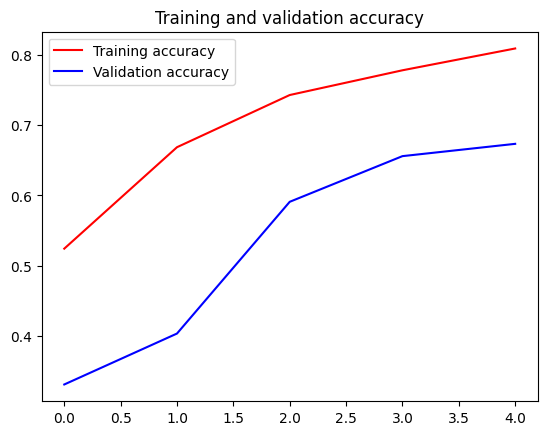

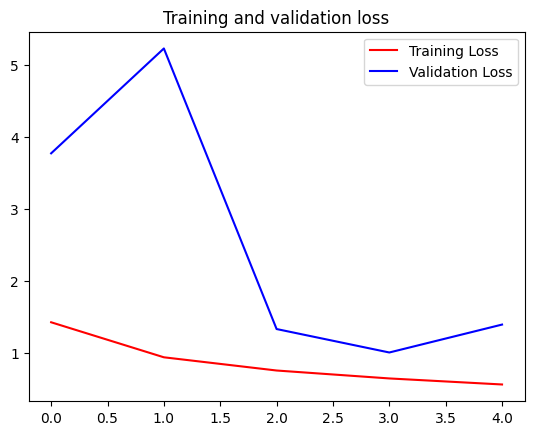

In [ ]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
history4=model4.fit(
  train_datagen,
  validation_data=test_datagen,
  epochs=5,callbacks=[checkpoint])

Epoch 1/5
300/300 [==============================] - ETA: 0s - loss: 3.2756 - accuracy: 0.1397
Epoch 1: val_accuracy did not improve from 0.80750
300/300 [==============================] - 80s 241ms/step - loss: 3.2756 - accuracy: 0.1397 - val_loss: 2.3300 - val_accuracy: 0.2279
Epoch 2/5
300/300 [==============================] - ETA: 0s - loss: 2.0832 - accuracy: 0.2982
Epoch 2: val_accuracy did not improve from 0.80750
300/300 [==============================] - 72s 240ms/step - loss: 2.0832 - accuracy: 0.2982 - val_loss: 1.3685 - val_accuracy: 0.4829
Epoch 3/5
300/300 [==============================] - ETA: 0s - loss: 1.2150 - accuracy: 0.5699
Epoch 3: val_accuracy did not improve from 0.80750
300/300 [==============================] - 72s 240ms/step - loss: 1.2150 - accuracy: 0.5699 - val_loss: 0.9564 - val_accuracy: 0.6237
Epoch 4/5
300/300 [==============================] - ETA: 0s - loss: 0.9631 - accuracy: 0.6470
Epoch 4: val_accuracy did not improve from 0.80750
300/300 [=====

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
import numpy as np
model_1 = load_model('/content/drive/MyDrive/model-01-0.7375.hdf5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_3 = load_model('/content/drive/MyDrive/model-03-0.8075.hdf5')
model_3 = Model(inputs=model_3.inputs,
             outputs=model_3.outputs,
              name='name_of_model_3')
models = [model_1, model_3]

weights = [0.9, 0.7]

#w = np.array([0.7, 0.9])
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]

#ensemble = VotingClassifier(estimators=models, weights=w, voting='soft')
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
import tensorflow as tf
ensemble_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history=ensemble_model.fit(
  train_datagen,
  validation_data=test_datagen,
  epochs=50)

Epoch 1/15
300/300 [==============================] - 390s 920ms/step - loss: 0.6946 - accuracy: 0.7597 - val_loss: 0.9770 - val_accuracy: 0.6450
Epoch 2/15
300/300 [==============================] - 202s 671ms/step - loss: 0.5888 - accuracy: 0.7862 - val_loss: 1.6631 - val_accuracy: 0.4638
Epoch 3/15
300/300 [==============================] - 206s 687ms/step - loss: 0.5620 - accuracy: 0.7628 - val_loss: 1.0583 - val_accuracy: 0.5796
Epoch 4/15
300/300 [==============================] - 206s 687ms/step - loss: 0.4884 - accuracy: 0.7805 - val_loss: 0.6672 - val_accuracy: 0.7212
Epoch 5/15
300/300 [==============================] - 200s 668ms/step - loss: 0.4231 - accuracy: 0.7945 - val_loss: 0.7607 - val_accuracy: 0.7067
Epoch 6/15
300/300 [==============================] - 201s 669ms/step - loss: 0.4098 - accuracy: 0.8003 - val_loss: 0.6600 - val_accuracy: 0.7604
Epoch 7/15
300/300 [==============================] - 201s 669ms/step - loss: 0.3813 - accuracy: 0.8105 - val_loss: 0.7153 -

In [ ]:
history=ensemble_model.fit(
  train_datagen,
  validation_data=test_datagen,
  epochs=50,callbacks=[checkpoint])

Epoch 1/50


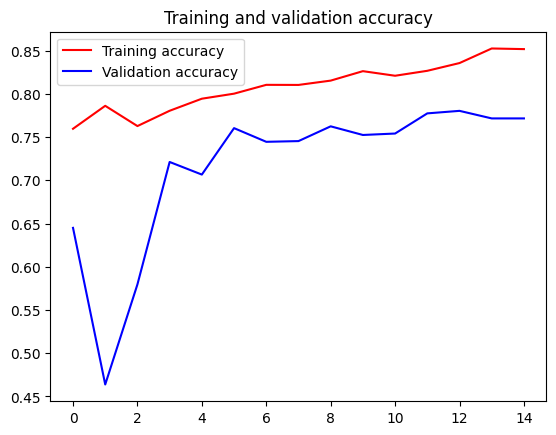

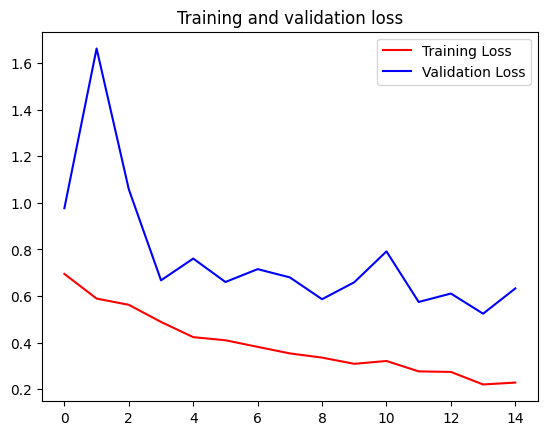

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
train_label = np.concatenate([y for x, y in train_datagen], axis=0)
print(train_label.shape)

test_label = np.concatenate([y for x, y in test_datagen], axis=0)
print(test_label.shape)

(9600,)
(2400,)
